<a href="https://colab.research.google.com/github/bikash451/Quantum-Multi-Modal-disease-prediction-system/blob/main/typeOfOrgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total samples: 670 | Features per sample: 512
Train samples: 536 | Test samples: 134
=== SVM ===
Accuracy: 0.96
              precision    recall  f1-score   support

       Brain       0.96      0.95      0.95        56
        Lung       1.00      1.00      1.00        35
       Heart       0.93      0.95      0.94        43

    accuracy                           0.96       134
   macro avg       0.97      0.97      0.97       134
weighted avg       0.96      0.96      0.96       134



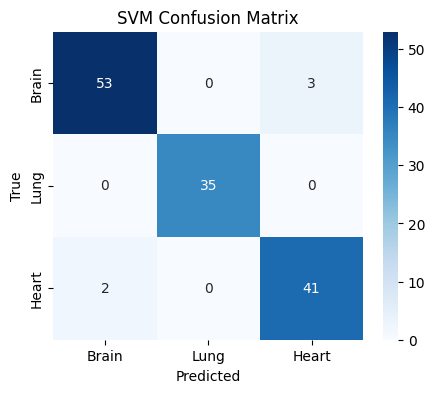

SVM Confusion Matrix:
[[53  0  3]
 [ 0 35  0]
 [ 2  0 41]]

=== Random Forest ===
Accuracy: 0.96
              precision    recall  f1-score   support

       Brain       0.96      0.96      0.96        56
        Lung       0.97      1.00      0.99        35
       Heart       0.95      0.93      0.94        43

    accuracy                           0.96       134
   macro avg       0.96      0.96      0.96       134
weighted avg       0.96      0.96      0.96       134



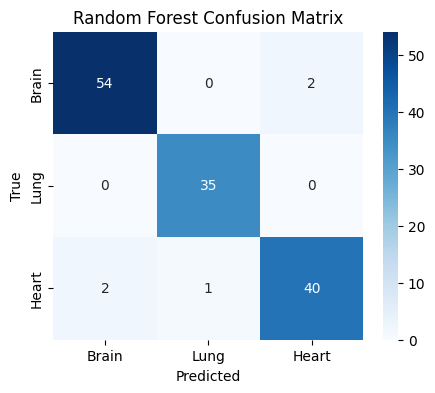

Random Forest Confusion Matrix:
[[54  0  2]
 [ 0 35  0]
 [ 2  1 40]]

=== k-NN ===
Accuracy: 0.96
              precision    recall  f1-score   support

       Brain       0.92      1.00      0.96        56
        Lung       1.00      1.00      1.00        35
       Heart       1.00      0.88      0.94        43

    accuracy                           0.96       134
   macro avg       0.97      0.96      0.97       134
weighted avg       0.97      0.96      0.96       134



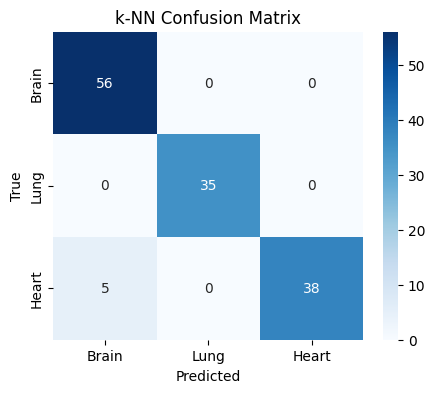

k-NN Confusion Matrix:
[[56  0  0]
 [ 0 35  0]
 [ 5  0 38]]

=== Logistic Regression ===
Accuracy: 0.97
              precision    recall  f1-score   support

       Brain       0.96      0.96      0.96        56
        Lung       1.00      1.00      1.00        35
       Heart       0.95      0.95      0.95        43

    accuracy                           0.97       134
   macro avg       0.97      0.97      0.97       134
weighted avg       0.97      0.97      0.97       134



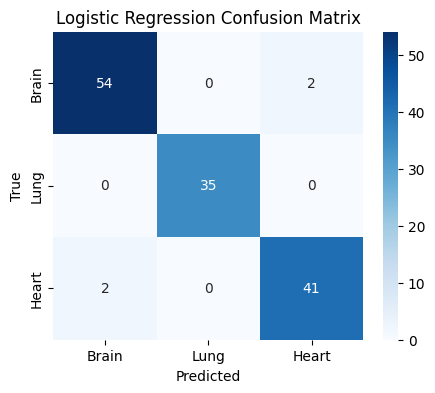

Logistic Regression Confusion Matrix:
[[54  0  2]
 [ 0 35  0]
 [ 2  0 41]]



In [1]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Settings ---
dataset_path = 'Dataset2/'
classes = ['Brain', 'Lung', 'Heart']
img_size = (128, 128)

# --- 2. Feature extraction ---
def extract_features_labels():
    features = []
    labels = []
    for class_idx, class_name in enumerate(classes):
        class_path = os.path.join(dataset_path, class_name)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                img = imread(img_path)
                img = resize(img, img_size)
                if len(img.shape) == 3:
                    img_gray = np.mean(img, axis=2)
                else:
                    img_gray = img
                hog_feat = hog(img_gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1))
                features.append(hog_feat)
                labels.append(class_idx)
            except Exception as e:
                print(f"Skipping {img_path}: {e}")
    return np.array(features), np.array(labels)

# --- 3. Load data ---
X, y = extract_features_labels()
print(f"Total samples: {len(X)} | Features per sample: {X.shape[1]}")

# --- 4. Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train samples: {len(X_train)} | Test samples: {len(X_test)}")

# --- 5. SVM ---
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# --- 6. Random Forest ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# --- 7. k-Nearest Neighbors ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# --- 8. Logistic Regression ---
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# --- 9. Accuracy matrices ---
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()
    return cm

def print_and_plot(model_name, y_test, y_pred):
    print(f"=== {model_name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred, target_names=classes))
    cm = plot_confusion_matrix(y_test, y_pred, classes, f"{model_name} Confusion Matrix")
    print(f"{model_name} Confusion Matrix:\n{cm}\n")
    return cm

cm_svm = print_and_plot("SVM", y_test, y_pred_svm)
cm_rf = print_and_plot("Random Forest", y_test, y_pred_rf)
cm_knn = print_and_plot("k-NN", y_test, y_pred_knn)
cm_logreg = print_and_plot("Logistic Regression", y_test, y_pred_logreg)

**CNN**

Loaded 670 images.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 16s 508ms/step - accuracy: 0.3577 - loss: 1.1001 - val_accuracy: 0.3148 - val_loss: 1.0983
Epoch 2/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 547ms/step - accuracy: 0.3297 - loss: 1.0983 - val_accuracy: 0.5648 - val_loss: 1.0822
Epoch 3/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 495ms/step - accuracy: 0.4865 - loss: 1.0284 - val_accuracy: 0.5648 - val_loss: 0.7866
Epoch 4/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 487ms/step - accuracy: 0.7588 - loss: 0.6547 - val_accuracy: 0.9074 - val_loss: 0.2834
Epoch 5/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 21s 494ms/step - accuracy: 0.9328 - loss: 0.2115 - val_accuracy: 0.9722 - val_loss: 0.0996
Epoch 6/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 21s 500ms/step - accuracy: 0.9658 - loss: 0.1076 - val_accuracy: 0.9722 - val_loss: 0.0981
Epoch 7/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 488ms/step - accuracy: 0.9853 - loss: 0.0637 - val_accuracy: 0.9815 - val_loss: 0.0569
Epoch 8/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 483ms/step - accuracy: 0.9767 - loss: 0.0527 - val_accu

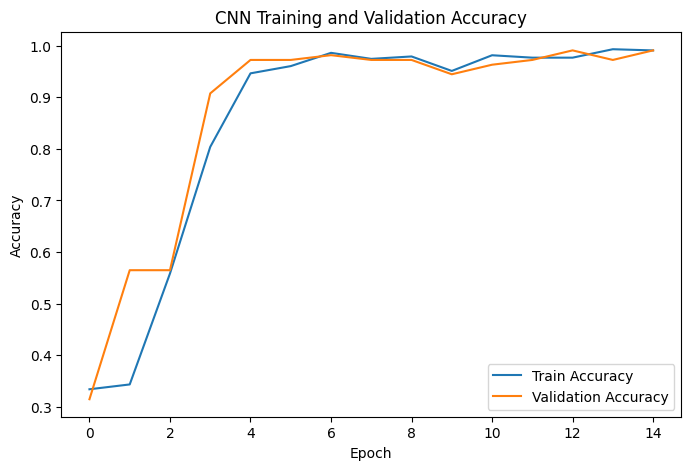

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step


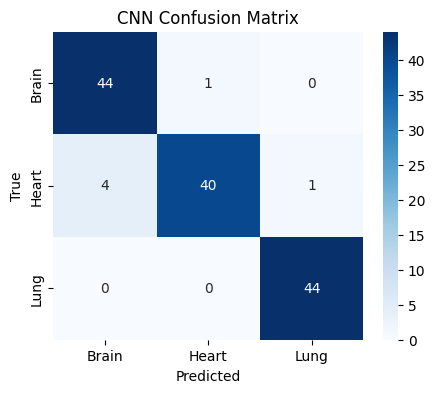

              precision    recall  f1-score   support

       Brain       0.92      0.98      0.95        45
       Heart       0.98      0.89      0.93        45
        Lung       0.98      1.00      0.99        44

    accuracy                           0.96       134
   macro avg       0.96      0.96      0.96       134
weighted avg       0.96      0.96      0.95       134



In [2]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# --- 1. Settings ---
dataset_path = 'Dataset2/'
classes = ['Brain', 'Heart', 'Lung']
img_size = (128, 128)

def load_images_and_labels():
    images, labels = [], []
    valid_exts = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')
    for idx, class_name in enumerate(classes):
        class_folder = os.path.join(dataset_path, class_name)
        for img_file in os.listdir(class_folder):
            if not img_file.lower().endswith(valid_exts):
                continue  # Skip non-image files
            img_path = os.path.join(class_folder, img_file)
            try:
                img = imread(img_path)
                img = resize(img, img_size, anti_aliasing=True)
                if img.ndim == 2:
                    img = np.stack([img]*3, axis=-1)
                elif img.shape[2] == 4:
                    img = img[..., :3]
                images.append(img)
                labels.append(idx)
            except Exception as e:
                print(f"Skipping {img_path}: {e}")
    return np.array(images), np.array(labels)

X, y = load_images_and_labels()
print(f"Loaded {X.shape[0]} images.")

# --- 3. Preprocess data ---
X = X.astype('float32') / 255.0
y_cat = to_categorical(y, num_classes=len(classes))
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42, stratify=y)

# --- 4. Build CNN model ---
def create_cnn(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_cnn(X_train[0].shape, len(classes))
model.summary()

# --- 5. Train ---
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2, batch_size=16)

# --- 6. Evaluate ---
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {acc:.4f}")

# --- 7. Plot accuracy curves ---
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.legend()
plt.show()

# --- 8. Confusion Matrix ---
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CNN Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=classes))

In [14]:
model.save('organ_cnn_model.h5')
print("Model saved as organ_cnn_model.h5")

from tensorflow.keras.models import load_model
from skimage.transform import resize
import numpy as np
from PIL import Image
import io

# --- Load the trained model ---
model = load_model('organ_cnn_model.h5')
classes = ['Brain', 'Heart', 'Lung']
img_size = (128, 128)

# --- User uploads image in notebook (Jupyter/Colab) ---
from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
    # Load image
    img = Image.open(io.BytesIO(uploaded[filename])).convert('RGB')
    img = img.resize(img_size)
    img_array = np.array(img).astype('float32') / 255.0
    img_array = img_array.reshape(1, img_size[0], img_size[1], 3)

    # Predict
    pred = model.predict(img_array)
    pred_class = classes[np.argmax(pred)]
    print(f"Predicted organ: {pred_class}")

Model saved as organ_cnn_model.h5


Saving IM00001.jpg to IM00001.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Predicted organ: Lung


In [17]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 110.9 MB/s eta 0:00:00


In [20]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

import pennylane as qml
from pennylane import numpy as pnp
from pennylane.optimize import AdamOptimizer

# --- 1. Load and preprocess images ---
dataset_path = 'Dataset2/'
classes = ['Brain', 'Heart', 'Lung']
img_size = (64, 64)  # smaller for faster feature extraction

def load_images_and_labels():
    images, labels = [], []
    for idx, class_name in enumerate(classes):
        class_folder = os.path.join(dataset_path, class_name)
        for img_file in os.listdir(class_folder):
            if not img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
                continue
            img_path = os.path.join(class_folder, img_file)
            try:
                img = imread(img_path)
                img = resize(img, img_size, anti_aliasing=True)
                if img.ndim == 2:
                    img = np.stack([img]*3, axis=-1)
                elif img.shape[2] == 4:
                    img = img[..., :3]
                images.append(img)
                labels.append(idx)
            except Exception as e:
                print(f"Skipping {img_path}: {e}")
    return np.array(images), np.array(labels)

X, y = load_images_and_labels()
print(f"Loaded {X.shape[0]} images.")

# --- 2. Feature extraction (HOG) ---
def extract_hog_features(images):
    return np.array([
        hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), channel_axis=-1)
        for img in images
    ])

X_hog = extract_hog_features(X)

# --- 3. Dimensionality reduction (PCA) ---
n_qubits = 3  # Number of features/qubits for the quantum circuit
pca = PCA(n_components=n_qubits)
X_reduced = pca.fit_transform(X_hog)

# --- 4. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, stratify=y, random_state=42)

# --- 5. Define quantum circuit classifier (PennyLane) ---
dev = qml.device("default.qubit", wires=n_qubits)

def layer(weights):
    for i in range(n_qubits):
        qml.RY(weights[i], wires=i)
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i+1])

@qml.qnode(dev)
def quantum_circuit(inputs, weights):
    for i in range(n_qubits):
        qml.RY(inputs[i], wires=i)
    layer(weights)
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# --- 6. Wrap as a scikit-learn classifier ---
from sklearn.base import BaseEstimator, ClassifierMixin

class QuantumClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_qubits=4, n_epochs=20, lr=0.1):
        self.n_qubits = n_qubits
        self.n_epochs = n_epochs
        self.lr = lr
        self.weights = None

    def fit(self, X, y):
        y_onehot = np.eye(len(np.unique(y)))[y]
        self.weights = pnp.random.randn(self.n_qubits, requires_grad=True)
        opt = AdamOptimizer(self.lr)

        for epoch in range(self.n_epochs):
            for xi, yi in zip(X, y_onehot):
                def cost(w):
                    preds = quantum_circuit(xi, w)
                    return np.sum((preds - yi[:self.n_qubits]) ** 2)
                self.weights = opt.step(cost, self.weights)
            if (epoch+1)%5 == 0:
                print(f"Epoch {epoch+1}/{self.n_epochs}")

        return self

    def predict(self, X):
        preds = [quantum_circuit(x, self.weights) for x in X]
        preds = np.array(preds)
        labels = np.argmax(preds, axis=1)
        return labels

# --- 7. Build and run the pipeline ---
pipeline = Pipeline([
    # ('scaler', StandardScaler()),  # Uncomment if scaling needed
    ('quantum', QuantumClassifier(n_qubits=n_qubits, n_epochs=10, lr=0.1))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred, target_names=classes))

Loaded 670 images.
Epoch 5/10
Epoch 10/10
              precision    recall  f1-score   support

       Brain       0.75      1.00      0.86        45
       Heart       0.44      0.60      0.50        45
        Lung       0.75      0.20      0.32        44

    accuracy                           0.60       134
   macro avg       0.65      0.60      0.56       134
weighted avg       0.64      0.60      0.56       134



/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [35]:
import joblib

joblib.dump(pipeline, "quantum_pipeline.pkl")

import joblib

from google.colab import files  # or use appropriate upload for Jupyter
import io
from PIL import Image
import numpy as np
from skimage.feature import hog
import joblib

# Load your pipeline and set class names
pipeline = joblib.load("quantum_pipeline.pkl")
class_names = ['Brain', 'Heart', 'Lung']
img_size = (64, 64)

uploaded = files.upload()

for filename in uploaded.keys():
    # Load and preprocess image
    img = Image.open(io.BytesIO(uploaded[filename])).convert('RGB')
    img = img.resize(img_size)
    img_array = np.array(img)
    # HOG expects float images in [0, 1]
    img_array = img_array.astype('float32') / 255.0
    # HOG expects shape (H, W, C)
    feature = hog(img_array, pixels_per_cell=(8, 8), cells_per_block=(2, 2), channel_axis=-1)
    feature = feature.reshape(1, -1)
    pred = pipeline.predict(feature)
    pred_class = class_names[pred[0]]
    print(f"Predicted organ: {pred_class}")

Saving IM-0067-0001.jpeg to IM-0067-0001.jpeg
Predicted organ: Brain
